In [1]:
from datetime import datetime
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
start = "01/04/19"
end ="02/03/23"

symbols = ["3407.JP","7453.JP","5021.JP","6504.JP","8035.JP","8830.JP","3626.JP","4062.JP","3861.JP","4206.JP"]

master_df = data.DataReader(symbols,"stooq",start,end)['Close'].sort_index()

In [3]:
master_df

Symbols,3407.JP,7453.JP,5021.JP,6504.JP,8035.JP,8830.JP,3626.JP,4062.JP,3861.JP,4206.JP
Date,,,,,,,,,,
2019-01-04,995.011,2414.78,1935.83,3058.31,10748.0,3769.51,1344.82,1396.80,510.623,3048.78
2019-01-07,1048.090,2460.19,1952.88,3165.27,11430.8,3890.10,1412.79,1452.24,528.782,3212.52
2019-01-08,1044.910,2473.18,2072.28,3170.14,11611.7,3870.01,1433.32,1463.70,522.437,3247.91
2019-01-09,1043.550,2488.01,2101.26,3179.86,11801.6,3851.84,1482.30,1448.39,541.513,3261.18
2019-01-10,1028.570,2229.47,2077.39,3087.48,12109.1,3848.00,1434.90,1443.62,544.242,3181.53
...,...,...,...,...,...,...,...,...,...,...
2023-01-27,971.000,1429.00,3695.00,5190.00,45480.0,3172.00,3715.00,5050.00,535.000,3105.00
2023-01-30,972.300,1433.00,3680.00,5250.00,45790.0,3156.00,3735.00,5160.00,532.000,3105.00
2023-01-31,982.400,1434.00,3620.00,5220.00,45170.0,3156.00,3730.00,5010.00,536.000,3130.00


In [4]:
df_day= master_df.pct_change()

returns_annual = df_day.mean()*245

cov_annual=df_day.cov()*245

In [5]:
num=100000
np.random.seed(0)

port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

In [6]:
# 様々な銘柄の比率でのポートフォリオのリターンとリスクを計算
for i in range(num): # single_portfolio

	# 銘柄の比率を乱数で決定
	weights = np.random.random(len(symbols))
	weights /= np.sum(weights)

	# ポートフォリオの期待リターンを計算
	returns = np.dot(weights, returns_annual)

	# ポートフォリオのボラティリティを計算
	volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

	# シャープレシオを計算
	sharpe = returns / volatility
	sharpe_ratio.append(sharpe)

	# 計算値をリストに格納
	port_returns.append(returns)
	port_volatility.append(volatility)
	stock_weights.append(weights)

# 辞書型に格納
portfolio = {"Returns": port_returns,
			"Volatility": port_volatility,
			"Sharpe Ratio" : sharpe_ratio}

# 計算したポートフォリオのリターンとリスクに、比率のデータを加える
for counter,symbol in enumerate(symbols):
    portfolio[str(symbol) + " Weight"] = [Weight[counter] for Weight in stock_weights]



In [7]:
df = pd.DataFrame(portfolio)
# データフレーム完成

df.tail(10)

,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
99990,0.178725,0.225081,0.794047,0.145317,0.043320,0.057870,0.046444,0.124834,0.145341,0.060348,0.170459,0.191881,0.014185
99991,0.171315,0.227220,0.753962,0.072046,0.143495,0.152285,0.154802,0.095249,0.109489,0.150514,0.055904,0.052024,0.014191
99992,0.117828,0.216291,0.544764,0.160996,0.165274,0.112881,0.001939,0.109698,0.068173,0.033434,0.060193,0.115197,0.172215
99993,0.221395,0.239245,0.925389,0.101178,0.068070,0.124488,0.147295,0.073475,0.085324,0.150452,0.209830,0.002530,0.037360
99994,0.194622,0.234363,0.830428,0.085312,0.176373,0.031314,0.013377,0.225094,0.052402,0.092857,0.144433,0.002189,0.176650
99995,0.146878,0.220336,0.666610,0.003796,0.056213,0.014664,0.191333,0.163794,0.076207,0.039038,0.012316,0.316626,0.126012
99996,0.113166,0.222245,0.509194,0.240143,0.061118,0.189536,0.015959,0.039013,0.007328,0.032991,0.039710,0.267637,0.106566
99997,0.153071,0.213498,0.716964,0.204935,0.032093,0.100721,0.018494,0.099350,0.091041,0.103157,0.082206,0.165974,0.102029
99998,0.136402,0.223500,0.610298,0.176814,0.076652,0.067982,0.048321,0.198848,0.168687,0.014610,0.022023,0.035306,0.190756
99999,0.164438,0.226083,0.727336,0.091315,0.102659,0.024623,0.175016,0.158678,0.017264,0.042070,0.078772,0.112210,0.197392


In [8]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# ポートフォリオをテキスト出力(ソートして出力)
print("\n---sharpe_portfolio-----\n") # 最大SR
sharpe_sort=sharpe_portfolio.iloc[:,3:].T
sharpe_sort.sort_values(by=sharpe_sort.columns[0] ,ascending=False ,axis=0,inplace=True)
print(sharpe_portfolio.iloc[:,0:2].T)
print(sharpe_sort)

print("\n---min_variance_port-----\n") # 最少分散ポートフォリオ
min_sort=min_variance_port.iloc[:,3:].T
min_sort.sort_values(by=min_sort.columns[0] ,ascending=False ,axis=0,inplace=True)
print(min_variance_port.iloc[:,0:2].T)
print(min_sort)


---sharpe_portfolio-----

               10054
Returns     0.295973
Volatility  0.243313
                   10054
3626.JP Weight  0.249128
4062.JP Weight  0.213369
8035.JP Weight  0.205396
5021.JP Weight  0.149791
4206.JP Weight  0.066380
6504.JP Weight  0.043249
7453.JP Weight  0.022521
8830.JP Weight  0.019926
3407.JP Weight  0.017061
3861.JP Weight  0.013179

---min_variance_port-----

               31473
Returns     0.142719
Volatility  0.202106
                   31473
3861.JP Weight  0.261076
3626.JP Weight  0.221668
4206.JP Weight  0.150182
3407.JP Weight  0.095320
8035.JP Weight  0.090555
8830.JP Weight  0.079452
7453.JP Weight  0.041013
5021.JP Weight  0.023299
6504.JP Weight  0.020084
4062.JP Weight  0.017352


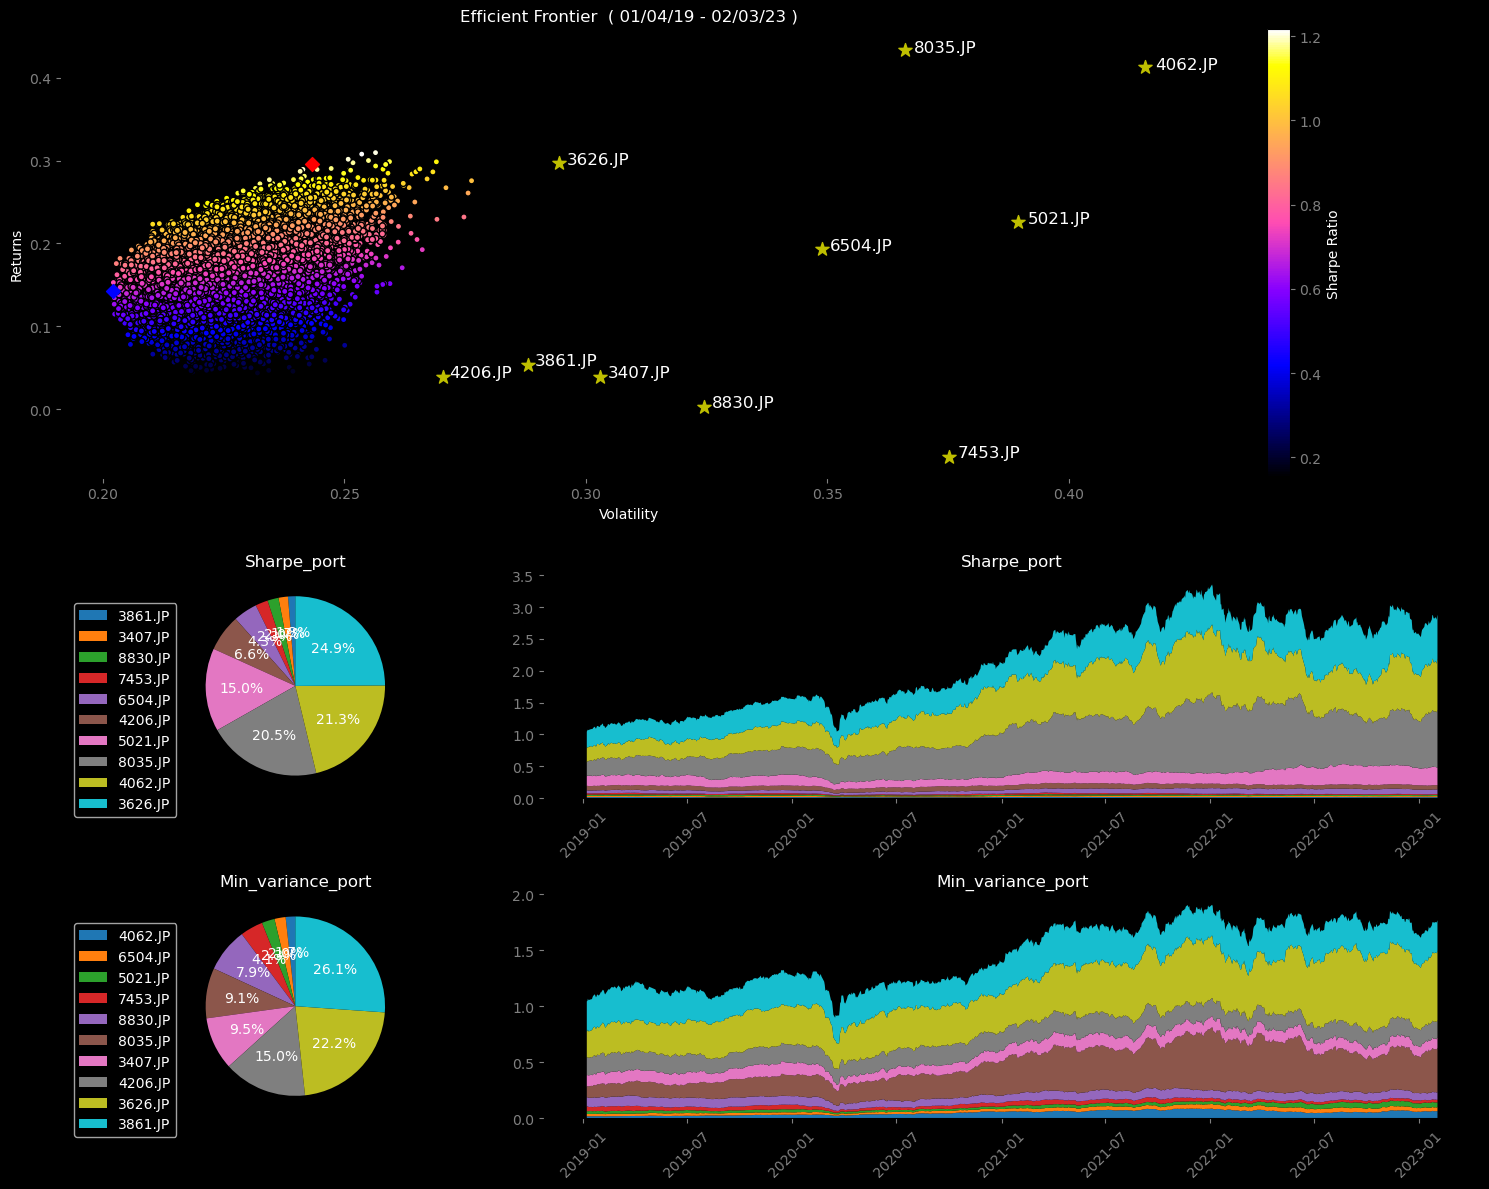

In [9]:
# グラフパラメータ設定
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["axes.labelcolor"] = 'white'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'white'

# グラフ領域設定
fig = plt.figure(facecolor='white',figsize=(15,12),tight_layout="True")
spec = gridspec.GridSpec(ncols=2, nrows=3,height_ratios=[1,0.5,0.5],width_ratios=[0.5,1])

#　グラフに領域を割り当て
ax1 =  fig.add_subplot(spec[0,:], title='Efficient Frontier  ( '+str(start) +" - "+str(end)+ " )")
ax2 =  fig.add_subplot(spec[1,0], title='Sharpe_port' )
ax3 =  fig.add_subplot(spec[2,0], title='Min_variance_port')
ax4 =  fig.add_subplot(spec[1,1], title='Sharpe_port')
ax5 =  fig.add_subplot(spec[2,1], title='Min_variance_port')
fig.patch.set_facecolor('black')

# フロンティア、シャープ最大値、ボラティリティ最小値の散布図
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',cmap='gnuplot2', edgecolors='black',alpha=1, ax=ax1)
ax1.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=50)
ax1.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=50 )

for counter,stock in enumerate(symbols):

   volatility = np.sqrt(cov_annual.loc[stock,stock])
   ax1.scatter(x=volatility, y=returns_annual[stock], c='y', marker='*', s=100)
   ax1.annotate(stock, (volatility*1.005, returns_annual[stock]*0.995),size=12,color="white")

# パイチャート1
df_pie1=sharpe_portfolio.T.iloc[3:,:]
df_pie1=df_pie1.sort_values(by=df_pie1.columns[0], axis=0, ascending=True, inplace=False)
col1=[s.replace(' Weight', '') for s in df_pie1.index.tolist()]
ax2.pie(df_pie1.iloc[:,0].tolist(), autopct="%1.1f%%",startangle=90)
ax2.legend(col1,fontsize=10,  bbox_to_anchor=(0, 0.9))


# パイチャート２
df_pie2=min_variance_port.T.iloc[3:,:]
df_pie2=df_pie2.sort_values(by=df_pie2.columns[0], axis=0, ascending=True, inplace=False)
col2=[s.replace(' Weight', '') for s in df_pie2.index.tolist()]
ax3.pie(df_pie2.iloc[:,0].tolist(), autopct="%1.1f%%",startangle=90)
ax3.legend(col2,fontsize=10,  bbox_to_anchor=(0, 0.9))


# 積み上げグラフの元データ
df_all=(1+master_df.pct_change()).cumprod()

# 積み上げグラフ１
df_sharpe=df_all.loc[:,col1]
for i in range(len(col1)):
 df_sharpe.iloc[:,i]=df_sharpe.iloc[:,i] * df_pie1.iloc[:,0].values[i]
ax4.stackplot(df_sharpe.index, df_sharpe.values.T)
ax4.tick_params(axis='x', labelrotation=45)

# 積み上げグラフ２
df_min=df_all.loc[:,col2]
for i in range(len(col2)):
 df_min.iloc[:,i]=df_min.iloc[:,i] * df_pie2.iloc[:,0].values[i]
ax5.stackplot(df_min.index, df_min.values.T)
ax5.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

In [10]:
df_sharpe = df.sort_values("Sharpe Ratio", ascending=True)
print("\n---sharpe_portfolio-----\n")
df_sharpe.tail(1)


---sharpe_portfolio-----



,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
10054,0.295973,0.243313,1.21643,0.017061,0.022521,0.149791,0.043249,0.205396,0.019926,0.249128,0.213369,0.013179,0.06638


In [11]:
df_min = df.sort_values("Volatility", ascending=True)
print("\n---min_variance_port-----\n")
df_min.head(1)


---min_variance_port-----



,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
31473,0.142719,0.202106,0.706162,0.09532,0.041013,0.023299,0.020084,0.090555,0.079452,0.221668,0.017352,0.261076,0.150182


In [12]:
ddff=df_sharpe.tail(1).drop(["Returns","Volatility","Sharpe Ratio"],axis=1)
x=[]
for i in range(0,len(ddff.columns)):
    x.append(round(ddff.iat[0,i],4))

# ポートフォリオ株価を求める際に、このリストをコピペで貼る
print(x)

[0.0171, 0.0225, 0.1498, 0.0432, 0.2054, 0.0199, 0.2491, 0.2134, 0.0132, 0.0664]
